In [10]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')

In [11]:
from american_option import *

In [106]:
base_df = pd.read_json('json/results_stack.json', orient='index').rename(columns={'y_true':'S', 'y_pred':'S_pred'})
std_df = pd.read_json('json/fitted_std_df.json', orient='index')
np.random.seed(0)

In [107]:
#Initialize option class
option = american_option(base_df, 24, 100000, std_df)

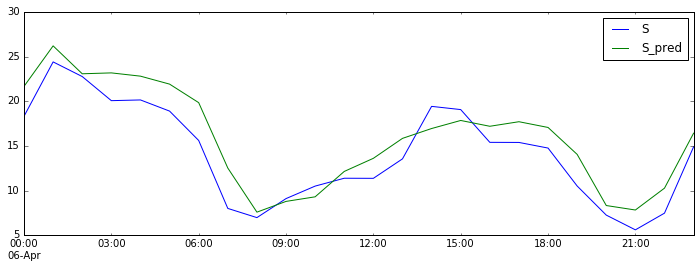

In [114]:
option.plot_real_predicted_values('2017-04-06 00:00:00')

In [115]:
df_mc = option.generate_random_paths('2017-04-06 00:00:00')

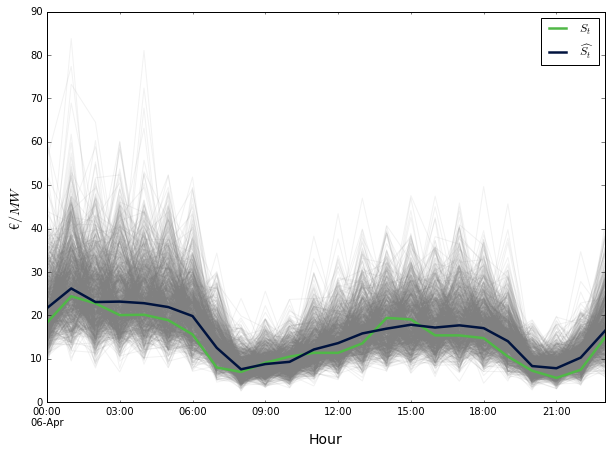

In [116]:
option.plot_montecarlo(save_bool=False)

In [117]:
#Compute option value
option.compute_option_value(10, 3)

25.010685298666669

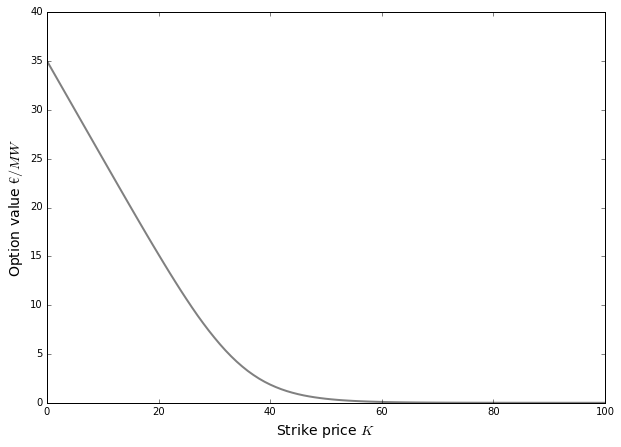

In [118]:
#Option value change against strike
K = np.linspace(0,100,101)
C_list = option.compute_option_value(K,3)
option.plot_option_value_vs_strike(K, C_list, '2017-04-06', save_bool=False)